<a href="https://colab.research.google.com/github/Rutuj18/assignment-3-es335-2024-ml_assignment_24/blob/main/ML_assignment3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import os
# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Warning for future updates in pandas library
try:
    import pyarrow
except ImportError:
    %pip install pyarrow
import pandas as pd

try:
    from statsmodels.tsa.arima.model import ARIMA, ARIMAResultsWrapper
except ImportError:
    %pip install statsmodels
    from statsmodels.tsa.arima.model import ARIMA, ARIMAResultsWrapper

In [2]:
def plot_compare_mlp(model, X_train, Y_train, scaler, K, T):
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)).reshape(-1, T)

    Y_train_preds = scaler.inverse_transform(model.predict(X_train).reshape(-1, 1)).reshape(-1, T)
    train_loss = mean_squared_error(Y_train, Y_train_preds)

    # Plot the first component against the second component
    plt.scatter(Y_train[:, 0], Y_train[:, 1], label='True', s=5)
    plt.scatter(Y_train_preds[:, 0], Y_train_preds[:, 1], label='Predicted', s=5)
    plt.title(f'MLP Model on Dataset with K = {K} and T = {T}')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.legend()
    plt.text(0.95, 0.95, 'Loss: {:.2f}'.format(train_loss), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()

In [3]:
def plot_compare_arma(model, Y_train, scaler, K, T):
    # Generate predictions
    Y_train_preds = np.empty_like(Y_train)
    for i in range(Y_train.shape[1]):
        model_i = model(Y_train[:, i], order=(1,0,1))
        model_i_fit = model_i.fit()
        Y_train_preds[:, i] = model_i_fit.predict(start=0, end=Y_train.shape[0]-1)

    # Inverse transform Y_train and Y_train_preds
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)).reshape(-1, T)
    Y_train_preds = scaler.inverse_transform(Y_train_preds.reshape(-1, 1)).reshape(-1, T)

    # Calculate loss
    train_loss = mean_squared_error(Y_train, Y_train_preds)

    # Plot the first component against the second component
    plt.scatter(Y_train[:, 0], Y_train[:, 1], label='True', s=5)
    plt.scatter(Y_train_preds[:, 0], Y_train_preds[:, 1], label='Predicted', s=5)
    plt.title(f'ARMA Model on Dataset with K = {K} and T = {T}')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.legend()
    plt.text(0.95, 0.95, 'Loss: {:.2f}'.format(train_loss), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()

In [4]:
def plot_compare_ma(model, Y_train, scaler, K, T):
    # Generate predictions
    Y_train_preds = np.empty_like(Y_train)
    for i in range(Y_train.shape[1]):
        model_i = model(Y_train[:, i], order=(0,0,1))  # MA model
        model_i_fit = model_i.fit()
        Y_train_preds[:, i] = model_i_fit.predict(start=0, end=Y_train.shape[0]-1)

    # Inverse transform Y_train and Y_train_preds
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)).reshape(-1, T)
    Y_train_preds = scaler.inverse_transform(Y_train_preds.reshape(-1, 1)).reshape(-1, T)

    # Calculate loss
    train_loss = mean_squared_error(Y_train, Y_train_preds)

    # Plot the first component against the second component
    plt.scatter(Y_train[:, 0], Y_train[:, 1], label='True', s=5)
    plt.scatter(Y_train_preds[:, 0], Y_train_preds[:, 1], label='Predicted', s=5)
    plt.title(f'MA Model on Dataset with K = {K} and T = {T}')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.legend()
    plt.text(0.95, 0.95, 'Loss: {:.2f}'.format(train_loss), horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    plt.show()

In [5]:
# Load the dataset
dataset = pd.read_csv('co2_mm_mlo(1).csv', comment='#')

# Display the first 5 rows
print(dataset.head())

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.70          314.43     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.71     -1 -9.99 -0.99
3  1958      6     1958.4548   317.24          315.14     -1 -9.99 -0.99
4  1958      7     1958.5370   315.86          315.18     -1 -9.99 -0.99


In [6]:
# Data processing
dataset = dataset[['year', 'month', 'decimal date', 'average', 'deseasonalized']]

print(dataset.head(), end="\n\n")

# Normalize the dataset
scaler = StandardScaler()
dataset['average'] = scaler.fit_transform(dataset[['average']])

print(dataset.head())

   year  month  decimal date  average  deseasonalized
0  1958      3     1958.2027   315.70          314.43
1  1958      4     1958.2877   317.45          315.16
2  1958      5     1958.3699   317.51          314.71
3  1958      6     1958.4548   317.24          315.14
4  1958      7     1958.5370   315.86          315.18

   year  month  decimal date   average  deseasonalized
0  1958      3     1958.2027 -1.372166          314.43
1  1958      4     1958.2877 -1.316538          315.16
2  1958      5     1958.3699 -1.314631          314.71
3  1958      6     1958.4548 -1.323213          315.14
4  1958      7     1958.5370 -1.367080          315.18


In [9]:
# Initial parameters
K = 4
T = 2

# Preparing Train and Test dataset
X_train = np.array([dataset[['average']][i:(i+K)] for i in range(len(dataset)-(K+T)+1)]).reshape(-1, K)
Y_train = np.array([dataset[['average']][(i+K):(i+K+T)] for i in range(len(dataset)-(K+T)+1)]).reshape(-1, T)

# Display the train and test datasets
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")

X_train: (787, 4), Y_train: (787, 2)


In [10]:
mlp = MLPRegressor(hidden_layer_sizes=[256, 64, 32], max_iter=1, warm_start=True, random_state=42)

In [11]:
# Train the model for 10000 epochs, printing the loss every 1000 epochs
for i in range(2000):
    mlp.fit(X_train, Y_train)
    if (i+1) % 500 == 0:
        predictions = mlp.predict(X_train)
        loss = mean_squared_error(Y_train, predictions)
        print(f'Loss at epoch {i+1}: {loss}')

Loss at epoch 500: 0.005052734412114474
Loss at epoch 1000: 0.0013540714451971956
Loss at epoch 1500: 0.001554479875293364
Loss at epoch 2000: 0.0018153528711679964


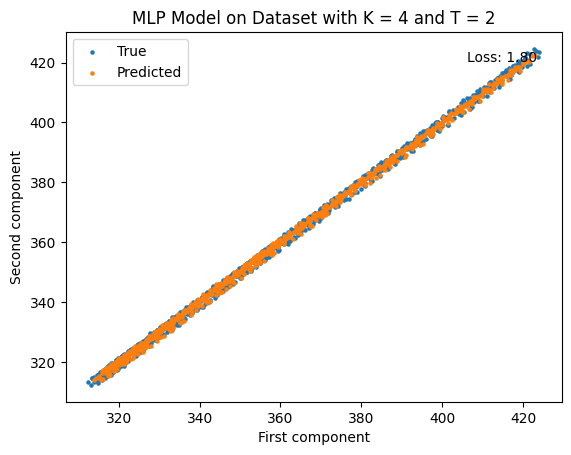

In [12]:
# Plot the datasets
plot_compare_mlp(mlp, X_train, Y_train, scaler, K, T)

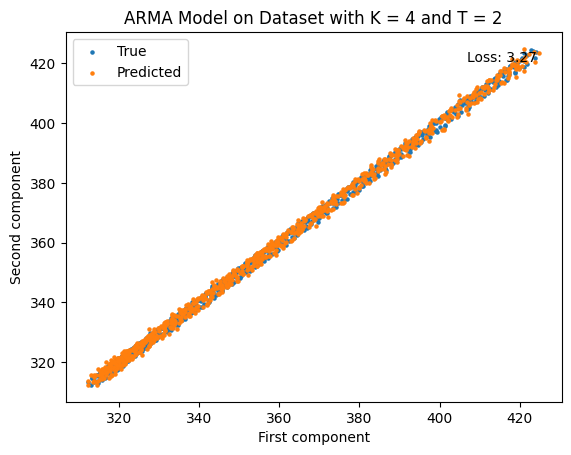

In [13]:
# Fit an ARMA model and plot the results
plot_compare_arma(ARIMA, Y_train, scaler, K, T)

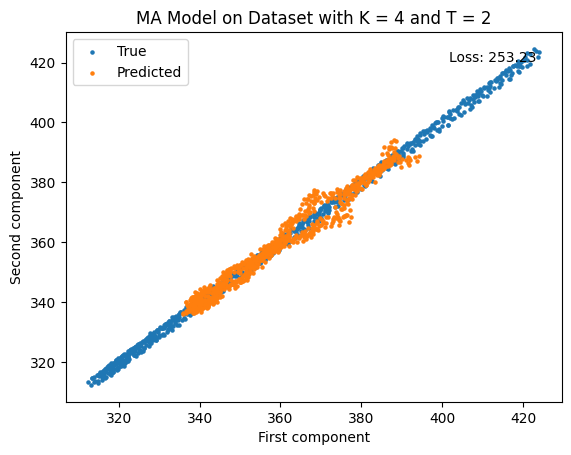

In [14]:
# Fit an MA model and plot the results
plot_compare_ma(ARIMA, Y_train, scaler, K, T)